In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from consts import res,lat,log
from utils import get_year_heatmap,generate_date_dataframe,draw_rat_heatmap,draw_pics,draw_rat_heatmaps,get_year_dataframes
import utils
import torch
import torch.optim as optim
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms

In [ ]:
df = utils.get_data('rat')
df['New_Date'] = pd.to_datetime(df['Created Date'])

In [4]:
df_list = []
year_pic_list = []
for i in range(9):
    tmp_df=get_year_dataframes(df,2010+i)
    year_pic_list.append(draw_rat_heatmaps(tmp_df,10))

In [5]:
year_pic_list = np.array(year_pic_list)
print(year_pic_list.shape)

(9, 12, 10, 10)


In [6]:
# 划分训练集和测试集
train_set = year_pic_list[:5]
test_set = year_pic_list[-4:]
print(train_set.shape,test_set.shape)

(5, 12, 10, 10) (4, 12, 10, 10)


In [38]:
train_set = train_set.reshape(-1,12,100)
test_set = test_set.reshape(-1,12,100)
print(train_set.shape)
print(test_set.shape)

(5, 12, 100)
(4, 12, 100)


In [39]:
train_set = train_set.reshape(-1,100)
test_set = test_set.reshape(-1,100)
print(train_set.shape)
print(test_set.shape)

(60, 100)
(48, 100)


In [ ]:
x = train_set[0]
k = round(100*0.5)
random_mask = np.random.choice(100,k,replace=False)
b = x.flat[random_mask]
print(b.shape)

In [21]:
print(train_set[1]-train_set[2])

[-10.  -7. -16.  -5.   2.   0.  -1.   0.   0.   0.  -1. -16.  -1.   0.
  -4.   1.   0.  -2.  -1.   0.  -1. -11. -11.  -7.  -1.   1.  -2.   3.
   0.   1.  -1.  -1.  -6.  -6.  -1.  -1.  -3.  -6.   0.  -1.  -2.  -6.
   0.   1.  -6.   0.  -2.  -3.   1.  -3. -14.  -2.   0.   1.   0.   0.
   2.   0.   1.  -1.  -4.  -1.   2.  -3.   1.   0.   0.   1.   0.   0.
   5.  -5.  -1.   5.  -1.  -1.  -1.   0.   0.   0.  -7.   0.   0.  -3.
   1.   0.   0.   0.   0.   0.  -2.  -7.   0.   0.   0.   0.   0.   0.
   0.  -1.]


In [73]:
# Multi HeatMap training
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
# optimizer = optim.SGD([A],lr=0.001)
optimizer = optim.Adam([A],lr=0.001)
loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
num_epochs = 10000
for epoch in range(num_epochs):
    for i,image in enumerate(train_set):
        x = Variable(torch.tensor(image,dtype=float))
        mask = np.random.choice(100,50,replace=False)
        b = image.flat[mask]
        b = Variable(torch.tensor(b,dtype=float))
        optimizer.zero_grad()
        b_pred = torch.mv(A,x)
        # loss = ((b_pred-b)**2).sum()
        loss = loss_fn(b_pred,b).sum()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch,loss)

0 tensor(1624.7510, dtype=torch.float64, grad_fn=<SumBackward0>)
100 tensor(466.7171, dtype=torch.float64, grad_fn=<SumBackward0>)
200 tensor(250.5921, dtype=torch.float64, grad_fn=<SumBackward0>)
300 tensor(180.0280, dtype=torch.float64, grad_fn=<SumBackward0>)
400 tensor(180.8839, dtype=torch.float64, grad_fn=<SumBackward0>)
500 tensor(119.2964, dtype=torch.float64, grad_fn=<SumBackward0>)
600 tensor(157.3041, dtype=torch.float64, grad_fn=<SumBackward0>)
700 tensor(145.1752, dtype=torch.float64, grad_fn=<SumBackward0>)
800 tensor(175.5768, dtype=torch.float64, grad_fn=<SumBackward0>)
900 tensor(132.1376, dtype=torch.float64, grad_fn=<SumBackward0>)
1000 tensor(113.0167, dtype=torch.float64, grad_fn=<SumBackward0>)
1100 tensor(117.3843, dtype=torch.float64, grad_fn=<SumBackward0>)
1200 tensor(174.8846, dtype=torch.float64, grad_fn=<SumBackward0>)
1300 tensor(156.9951, dtype=torch.float64, grad_fn=<SumBackward0>)
1400 tensor(180.8786, dtype=torch.float64, grad_fn=<SumBackward0>)
1500 t

In [76]:
A.requires_grad = False
print(A)

tensor([[-0.2224,  0.3212, -0.2449,  ...,  0.0416,  1.7512, -1.4694],
        [-0.4554, -0.4058, -0.0609,  ..., -0.2201,  0.4613,  0.1053],
        [-0.2069,  0.0427, -0.6383,  ..., -0.8880,  0.1542,  0.5537],
        ...,
        [-0.0951, -0.0799,  0.3177,  ...,  0.1697, -0.2833,  5.8332],
        [-0.1445,  0.3018,  0.1745,  ..., -1.7194,  0.2525,  1.2449],
        [-1.0263, -0.4918,  0.1208,  ...,  1.2586, -0.5053,  2.0648]],
       dtype=torch.float64)


In [77]:
num = 2
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
optimizer = optim.Adam([origin_x],lr = 0.001)
x = Variable(torch.tensor(test_set[num],dtype=float))
mask = np.random.choice(100,50,replace=False)
b = test_set[num].flat[mask]
b = Variable(torch.tensor(b,dtype=float))
for i in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = loss_fn(b_pred,b).sum()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(i,loss)

0 tensor(494.7988, dtype=torch.float64, grad_fn=<SumBackward0>)
100 tensor(446.4287, dtype=torch.float64, grad_fn=<SumBackward0>)
200 tensor(408.1343, dtype=torch.float64, grad_fn=<SumBackward0>)
300 tensor(375.7176, dtype=torch.float64, grad_fn=<SumBackward0>)
400 tensor(347.5362, dtype=torch.float64, grad_fn=<SumBackward0>)
500 tensor(325.2550, dtype=torch.float64, grad_fn=<SumBackward0>)
600 tensor(306.5018, dtype=torch.float64, grad_fn=<SumBackward0>)
700 tensor(288.0069, dtype=torch.float64, grad_fn=<SumBackward0>)
800 tensor(269.7388, dtype=torch.float64, grad_fn=<SumBackward0>)
900 tensor(252.7254, dtype=torch.float64, grad_fn=<SumBackward0>)
1000 tensor(237.9162, dtype=torch.float64, grad_fn=<SumBackward0>)
1100 tensor(227.6887, dtype=torch.float64, grad_fn=<SumBackward0>)
1200 tensor(217.5040, dtype=torch.float64, grad_fn=<SumBackward0>)
1300 tensor(208.9096, dtype=torch.float64, grad_fn=<SumBackward0>)
1400 tensor(202.7036, dtype=torch.float64, grad_fn=<SumBackward0>)
1500 te

tensor([-1.7206, -1.2688, -1.4833, -0.3547,  1.4005,  1.8734, -0.4276,  1.4075,
        -0.5490, -0.5804,  0.7977, -0.9022,  0.0464,  3.1394, -2.1039, -1.3158,
        -1.1142,  3.2315,  0.8165,  0.3432,  2.7893,  0.5463,  0.6574, -2.0598,
        -0.5876, -0.5794, -0.7035,  1.4395, -0.5426, -1.2571,  1.1595,  0.4168,
         2.5209, -0.2091,  0.9154,  2.9825,  2.5021,  1.8545, -1.9776,  1.3862,
         1.3917, -1.7557, -1.5214,  0.3152, -0.1529, -0.1603, -0.7138,  0.4252,
        -0.2783,  0.0668, -0.2559, -1.1464,  0.4271,  1.5804, -0.5153, -0.8518,
        -0.5912, -0.7806, -0.1548,  1.4805,  1.1326,  0.5619, -0.9590,  2.2268,
         0.5448,  0.0213, -0.0184, -1.1007, -0.7860,  1.2908,  2.7426, -0.6468,
         0.4308, -1.8752,  0.1033, -0.0974,  0.4610,  1.1353, -0.0588,  0.3611,
         0.6138,  0.0626,  2.2802,  0.5802, -1.2236, -0.3469,  1.0588,  0.6974,
         0.6982, -0.1123,  2.0292, -0.4851,  0.9634,  0.2122,  2.8142,  1.9684,
        -1.5610,  0.6847, -0.0644,  0.20

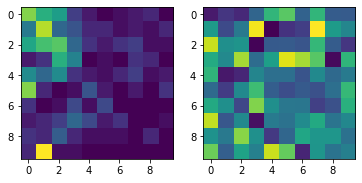

In [85]:
print(origin_x)
print(x)
print(b)
print(b_pred)
origin_x.detach()
o_x = origin_x.detach().numpy()
# plt.imshow(x.numpy())
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(o_x.reshape(10,10))
plt.show()
# print(o_x.describe())

In [72]:
# Multi HeatMap training
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
optimizer = optim.SGD([A],lr=0.001)
loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
num_epochs = 10000
for epoch in range(num_epochs):
    for i,image in enumerate(train_set):
        x = Variable(torch.tensor(image,dtype=float))
        mask = np.random.choice(100,50,replace=False)
        b = image.flat[mask]
        b = Variable(torch.tensor(b,dtype=float))
        optimizer.zero_grad()
        b_pred = torch.mv(A,x)
        # loss = ((b_pred-b)**2).sum()
        loss = loss_fn(b_pred,b).sum()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch,loss)

0 tensor(910.1614, dtype=torch.float64, grad_fn=<SumBackward0>)
100 tensor(272.3040, dtype=torch.float64, grad_fn=<SumBackward0>)
200 tensor(200.2320, dtype=torch.float64, grad_fn=<SumBackward0>)
300 tensor(220.2951, dtype=torch.float64, grad_fn=<SumBackward0>)
400 tensor(189.7315, dtype=torch.float64, grad_fn=<SumBackward0>)
500 tensor(151.0638, dtype=torch.float64, grad_fn=<SumBackward0>)
600 tensor(190.4859, dtype=torch.float64, grad_fn=<SumBackward0>)
700 tensor(287.5944, dtype=torch.float64, grad_fn=<SumBackward0>)
800 tensor(198.2663, dtype=torch.float64, grad_fn=<SumBackward0>)
900 tensor(174.1867, dtype=torch.float64, grad_fn=<SumBackward0>)
1000 tensor(135.1232, dtype=torch.float64, grad_fn=<SumBackward0>)
1100 tensor(234.2158, dtype=torch.float64, grad_fn=<SumBackward0>)
1200 tensor(166.7627, dtype=torch.float64, grad_fn=<SumBackward0>)
1300 tensor(226.6708, dtype=torch.float64, grad_fn=<SumBackward0>)
1400 tensor(191.0183, dtype=torch.float64, grad_fn=<SumBackward0>)
1500 te

In [62]:
print(A)
num = 2
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
A.requires_grad = False
optimizer = optim.SGD([origin_x],lr = 0.001)
x = Variable(torch.tensor(test_set[num],dtype=float))
mask = np.random.choice(100,50,replace=False)
b = test_set[num].flat[mask]
b = Variable(torch.tensor(b,dtype=float))
for i in range(2):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()
    print(i,loss)

tensor([[-2.7101e+44, -2.5797e+44, -7.3718e+44,  ...,  7.3656e+42,
         -4.8579e+43, -7.1129e+36],
        [ 1.7838e+44,  1.6980e+44,  4.8521e+44,  ..., -4.8480e+42,
          3.1974e+43,  4.6817e+36],
        [-3.8282e+44, -3.6440e+44, -1.0413e+45,  ...,  1.0404e+43,
         -6.8621e+43, -1.0047e+37],
        ...,
        [-2.4172e+43, -2.3009e+43, -6.5751e+43,  ...,  6.5696e+41,
         -4.3329e+42, -6.3442e+35],
        [ 6.5795e+43,  6.2630e+43,  1.7897e+44,  ..., -1.7882e+42,
          1.1794e+43,  1.7269e+36],
        [ 1.1082e+44,  1.0549e+44,  3.0144e+44,  ..., -3.0119e+42,
          1.9864e+43,  2.9086e+36]], dtype=torch.float64)
0 tensor(2.8935e+92, dtype=torch.float64, grad_fn=<SumBackward0>)
1 tensor(3.4162e+271, dtype=torch.float64, grad_fn=<SumBackward0>)


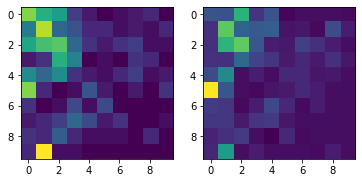

count     1.000000e+02
mean     8.080464e+177
std                inf
min     -2.664855e+177
25%      4.139862e+175
50%      3.043234e+177
75%      9.257098e+177
max      7.242988e+178
dtype: float64


In [63]:
origin_x.detach()
o_x = origin_x.detach().numpy()
# plt.imshow(x.numpy())
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(o_x.reshape(10,10))
plt.show()
# print(o_x.describe())
print(pd.Series(o_x).describe())

In [ ]:
print(train_set.shape)

In [64]:
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
b = Variable(torch.tensor(b,dtype=float))
x = Variable(torch.tensor(x,dtype=float))

optimizer = optim.SGD([A],lr=0.01)

num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        print(epoch,loss)

b_pred = torch.mv(A,x)
print(b_pred)
print("A:\n",A)

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
optimizer = optim.SGD([origin_x],lr=0.01)

num_epochs = 1
for epoch in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(epoch,loss)

In [ ]:
origin_xx = Variable(torch.randn(100,dtype=float))
plt.imshow(origin_xx.reshape(10,10))
plt.show()

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(origin_x.detach().reshape(10,10))
plt.show()